# Evaporation and Condensation 
[<!-- module-htg badge --><span class="module module-htg">High-Temperature Geochemistry</span>](module-htg) 


Evaporation-condensation processes are of particular interest in stable isotope geochemistry because they generate large isotope effects. This is demonstrated in the figure below, which shows the $H$ and $O$ liquid/vapor fractionation factors $\alpha$, as calculated from the ${^{18}O}/{^{16}O}$ and $D/H$ ratios of water vapor that is in equilibrium with liquid water. At equilibrium, the liquid is enriched in the heavy isotopes because “heavy water” (${H_2}^{18}O$, ${D_2}^{16}O$) has a lower vapor pressure than “light water” (${H_2}^{16}O$). The temperature dependence of the equilibrium isotope fractionation factors is also clearly visible in the diagram. 

<p style="text-align:center;"><img src="images/EC1.png" style= "width: 70%"/></p>

```{index} Rayleigh equation
```

The isotopic fractionation that occurs during evaporation-condensation is best treated theoretically in terms of fractional distillation or condensation under equilibrium conditions, as expressed by the **Rayleigh equation**. 

For a **condensation** process, this assumes that equilibrium extends between the vapor and an infinitesimally small batch of liquid. In this case the equation is: 

$$\frac{R_V}{R_{V,0}} = f^{\alpha - 1}$$

where $f$ is the fraction of *vapor remaining*, $R_{V,0}$ is the isotope ratio of the initial vapor at $f = 1$ (initial bulk system), $R_V$ is the isotope ratio of the remaining vapor, and the fractionation factor $\alpha$ is given by $\alpha = R_L/R_V$.

The “instantaneous” isotope composition of the condensate ($R_L$) that forms at a particular value of $f$ is given by: 

$$\frac{R_L}{R_{V,0}} = \alpha f^{\alpha - 1}$$

The “integrated” isotope composition of the accumulated and separated condensate that is formed by condensation between $f = 1$ and $f$ can be expressed as: 

$$\frac{\bar{R_L}}{R_{V,0}} = \frac{\int_{f}^{1}\frac{R_L}{R_{V,0}}df}{1-f} = \frac{\int_{f}^{1}\alpha f^{\alpha - 1}df}{1-f}$$

$$\therefore \frac{\bar{R_L}}{R_{V,0}} = \frac{1-f^\alpha}{1-f}$$

For Rayleigh **evaporation**, the isotope composition of the remaining liquid ($R_L$) at any given value of $f$ (where $f$ is now the fraction of *remaining liquid*), is given by: 

$$\frac{R_L}{R_{L,0}} = f^{\frac{1}{\alpha} - 1}$$

where $R_{L,0}$ is the isotope ratio of the initial liquid at $f = 1$ (initial bulk system). 

The isotope composition of the “instantaneous” vapor at any particular value of $f$ is: 

$$\frac{R_V}{R_{L,0}} = \frac{1}{\alpha}f^{\frac{1}{\alpha} - 1}$$

The isotope composition of the accumulated vapor (formed between $f = 1$ and $f$) is therefore given by: 

$$\frac{\bar{R_V}}{R_{L,0}} = \frac{\int_{f}^{1}\frac{R_V}{R_{L,0}}df}{1-f} = \frac{\int_{f}^{1}\frac{1}{\alpha}f^{\frac{1}{\alpha} - 1}df}{1-f}$$

$$\therefore \frac{\bar{R_V}}{R_{L,0}} = \frac{1-f^{\frac{1}{\alpha}}}{1-f}$$

In [14]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor

In [15]:
# create our own functions

# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    if value_rounded == int(value_rounded): 
        value_rounded = int(value_rounded)
    return value_rounded
            

# function representing delta notation (permil deviation)
def delta_notation(delta_value, ratio_sample, ratio_standard):
    if delta_value == '?':
        return ((ratio_sample/ratio_standard) - 1) * 1000
    elif ratio_sample == '?':
        return ratio_standard * (1+delta_value/1000)
    
    
# From the Stable Isotope Geochemistry page - Problem Set 8, Question 1
# function to calculate the kinetic isotope fractionation factor from mass
# the input is a string of isotopic ratio (usable for elements only, not compounds!)
def fractionation_factor_calculator_from_mass(isotopic_ratio):
    # The numbers in the inputted string will be extracted by looping for each of its characters
    extracted_number_str = ''
    for c in isotopic_ratio:
        if c.isnumeric(): extracted_number_str += c
        else: extracted_number_str += ' '
    # get a list of numbers in the inputted string
    mass_list = extracted_number_str.strip().split(' ')
    mass_list = [float(n) for n in mass_list if n != '']
    # return the value of fractionation factor
    return (mass_list[0]/mass_list[1])**0.5

In [16]:
# function for calculating the RV/R(V,0) ratio of remaining vapor at a fraction of f
def ratio_RV_RV0_remaining_vapor(f, a):
    return f**(a-1)


# function for calculating the RL/R(V,0) ratio of instantaneous condensate formed at a particular f
def ratio_RL_RV0_instantaneous_condensate(f, a):
    return a * f**(a-1)


# function for calculating the RL/R(V,0) ratio of accumulated condensate formed over the condensating interval f=1 to f
def ratio_RL_RV0_accumulated_condensate(f, a):
    return (1-f**a)/(1-f)


# function for calculating the RL/R(L,0) ratio of remaining liquid at a fraction of f
def ratio_RL_RL0_remaining_liquid(f, a):
    return f**(1/a - 1)


# function for calculating the RL/R(V,0) ratio of instantaneous vapor formed at a particular f
def ratio_RV_RL0_instantaneous_vapor(f, a):
    return (1/a) * f**(1/a - 1)


# function for calculating the RL/R(V,0) ratio of accumulated vapor formed over the evaporating interval f=1 to f
def ratio_RV_RL0_accumulated_vapor(f, a):
    return (1-f**(1/a))/(1-f)

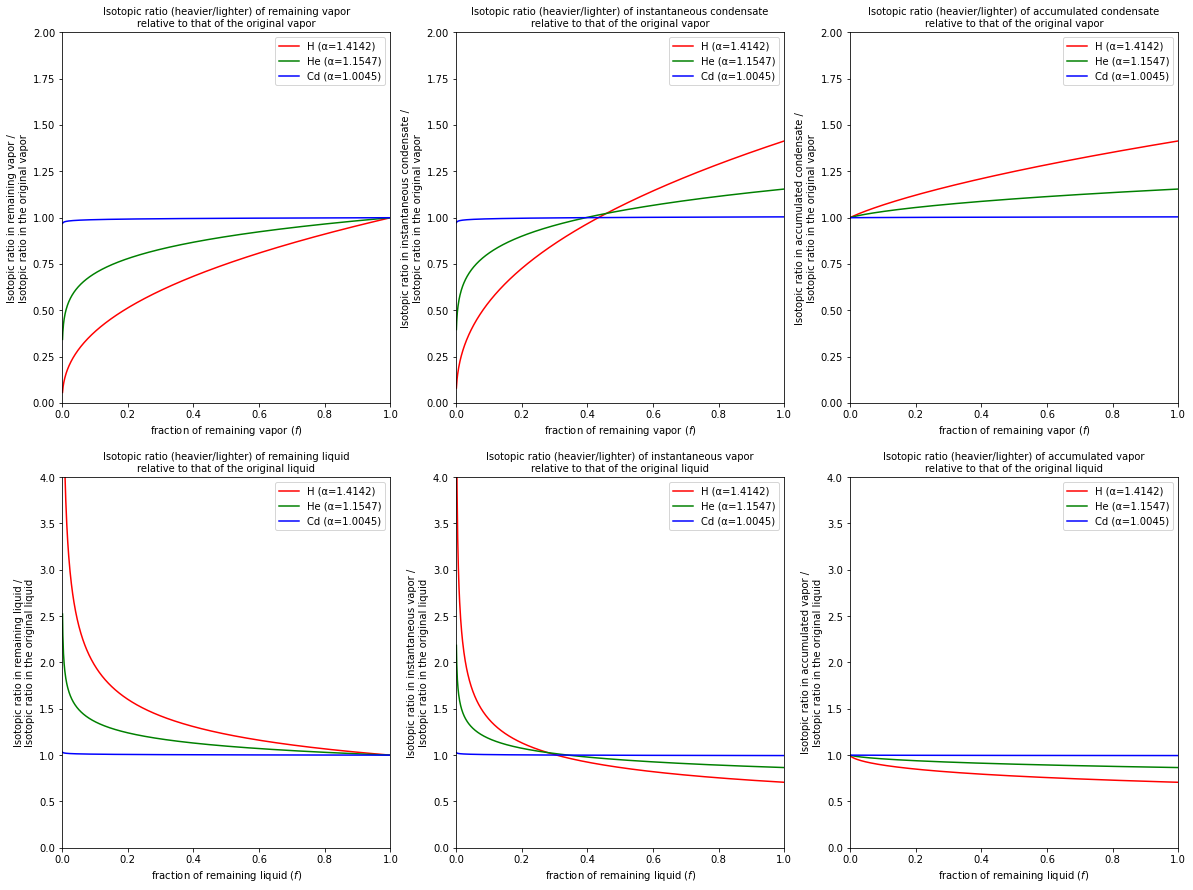

In [17]:
# sets of figures, titles and functions
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
axes = (ax1, ax2, ax3, ax4, ax5, ax6)
titles = ("remaining vapor", "instantaneous condensate", "accumulated condensate", 
          "remaining liquid", "instantaneous vapor", "accumulated vapor")
functions = (ratio_RV_RV0_remaining_vapor, ratio_RL_RV0_instantaneous_condensate, 
             ratio_RL_RV0_accumulated_condensate, ratio_RL_RL0_remaining_liquid, 
             ratio_RV_RL0_instantaneous_vapor, ratio_RV_RL0_accumulated_vapor)  # set corresponding functions to plot

# prepare sets of f and a values, and colors
f = np.linspace(0.001, 0.999, 1000)
elements = ['H', 'He', 'Cd']
a = [
    fractionation_factor_calculator_from_mass("2H/1H"), 
    fractionation_factor_calculator_from_mass("4He/3He"), 
    fractionation_factor_calculator_from_mass("111Cd/110Cd")
]
colors = ['r', 'g', 'b']

# plot
for i in range(len(axes)):
    for j in range(len(a)):
        ratio = functions[i](f, a[j])
        axes[i].plot(f, ratio, colors[j], label=f'{elements[j]} (α={a[j]:.4f})')
    if "condensate" in titles[i] or titles[i] == "remaining vapor":
        axes[i].set_xlabel('fraction of remaining vapor ($f$)')
        axes[i].set_ylabel("Isotopic ratio in " + titles[i] + " /\nIsotopic ratio in the original vapor")
        axes[i].set_title("Isotopic ratio (heavier/lighter) of " + titles[i] + "\nrelative to that of the original vapor", fontsize=10)   
        axes[i].set_ylim([0, 2])
        
    elif "vapor" in titles[i] or titles[i] == "remaining liquid":
        axes[i].set_xlabel('fraction of remaining liquid ($f$)')
        axes[i].set_ylabel("Isotopic ratio in " + titles[i] + " /\nIsotopic ratio in the original liquid")
        axes[i].set_title("Isotopic ratio (heavier/lighter) of " + titles[i] + "\nrelative to that of the original liquid", fontsize=10)  
        axes[i].set_ylim([0, 4])
        
    axes[i].set_xlim([0, 1])
    axes[i].legend(loc='best', fontsize=10)

Rayleigh evaporation and condensation processes generate characteristic trends in isotope compositions. As condensation or evaporation proceeds ($f$ decreases), the residual vapor or liquid becomes progressively enriched or depleted with respect to the light isotope. 

A “natural” example of this is the fractionation of $O$ isotopes between the water vapor of a cloud and the raindrops that are formed in and released from the cloud. With decreasing temperature, the $\delta^{18}O$ values of the condensate decreases, because the fraction of vapor remaining decreases (even though $\alpha$ increases).

<p style="text-align:center;"><img src="images/EC2.png" style= "width: 40%"/></p>


## Problem Set 8

### Question 2

Water vapor with an $O$ isotope composition of ${^{18}O}/{^{16}O} = 2.00 \times 10^{-3}$, is assumed to undergo fractional condensation. We assume that $60\%$ of the vapor initially present condenses at conditions where the fractionation factor is $\alpha = 1.009$. The fractionation factor is defined as the ratio of ${^{18}O}/{^{16}O}$ in the liquid to ${^{18}O}/{^{16}O}$ in the vapor.

a) What is the ${^{18}O}/{^{16}O}$ ratio and $\delta^{18}O$ value of the remaining vapor?

b) What is the ${^{18}O}/{^{16}O}$ ratio and $\delta^{18}O$ value of the last bit of condensate that forms, when $60\%$ of the system has condensed?

c) What is the ${^{18}O}/{^{16}O}$ ratio and $\delta^{18}O$ value of the accumulated condensate?

<u>Solution</u>:

a) Use the equation:

$$\frac{R_V}{R_{V,0}} = f^{\alpha - 1}$$

b) Use the equation:

$$\frac{R_L}{R_{V,0}} = \alpha f^{\alpha - 1}$$

c) Use the equation:

$$\frac{\bar{R_L}}{R_{V,0}} = \frac{1-f^\alpha}{1-f}$$

In [18]:
# given data
R_original_vapor = 2.00 * 10**-3  # the O ratio of original vapor
R_SMOW = 2.0052 * 10**-3  # the O ratio of the standard (SMOW)
f = 0.4  # the fraction of remaining vapor, as 60% condenses
a = 1.009  # fractionation factor

# calculate permil deviation of O of the original vapor
delta_18O_original_vapor = delta_notation('?', R_original_vapor, R_SMOW)
# print value
print("The permil deviation of O of the original vapor is %.1f ‰.\n" % delta_18O_original_vapor)

# Question 2a
R_remaining_vapor = R_original_vapor * ratio_RV_RV0_remaining_vapor(f, a)  # O ratio of the remaining vapor
delta_18O_remaining_vapor = delta_notation('?', R_remaining_vapor, R_SMOW)  # permil deviation of O of the remaining vapor
# print answers
print("(a)\n\
The O-18/O-16 ratio of the remaining vapor is %.3e.\n\
The permil deviation of O of the remaining vapor is %.1f ‰.\n" \
     % (R_remaining_vapor, delta_18O_remaining_vapor))

# Question 2b
R_instantaneous_condensate = R_original_vapor * ratio_RL_RV0_instantaneous_condensate(f, a)  # O ratio of the remaining vapor
delta_18O_instantaneous_condensate = delta_notation('?', R_instantaneous_condensate, R_SMOW)  # permil deviation of O of the remaining vapor
# print answers
print("(b)\n\
In case %d%% of the original vapor has condensed (f=%g),\n\
The O-18/O-16 ratio of the instantaneous condensate is %.3e.\n\
The permil deviation of O of the instantaneous condensate is %.1f ‰.\n" \
     % ((1-f)*100, f, R_instantaneous_condensate, delta_18O_instantaneous_condensate))

# Question 2b
R_accumulated_condensate = R_original_vapor * ratio_RL_RV0_accumulated_condensate(f, a)  # O ratio of the remaining vapor
delta_18O_accumulated_condensate = delta_notation('?', R_accumulated_condensate, R_SMOW)  # permil deviation of O of the remaining vapor
# print answers
print("(c)\n\
In case %d%% of the original vapor has condensed (f=%g),\n\
The O-18/O-16 ratio of the accumulated condensate is %.3e.\n\
The permil deviation of O of the accumulated condensate is %.1f ‰." \
     % ((1-f)*100, f, R_accumulated_condensate, delta_18O_accumulated_condensate))

The permil deviation of O of the original vapor is -2.6 ‰.

(a)
The O-18/O-16 ratio of the remaining vapor is 1.984e-03.
The permil deviation of O of the remaining vapor is -10.8 ‰.

(b)
In case 60% of the original vapor has condensed (f=0.4),
The O-18/O-16 ratio of the instantaneous condensate is 2.001e-03.
The permil deviation of O of the instantaneous condensate is -1.9 ‰.

(c)
In case 60% of the original vapor has condensed (f=0.4),
The O-18/O-16 ratio of the accumulated condensate is 2.011e-03.
The permil deviation of O of the accumulated condensate is 2.9 ‰.


### Question 3 

We assume that the original water vapor of question 2, which displays $\delta^{18}O = -2.6‰$, condenses completely.

a) What is the ${^{18}O}/{^{16}O}$ ratio and $\delta^{18}O$ value of the condensate? Note that the result is independent of the condensation mechanism.

b) The liquid water that was formed in the last question (3a) is assumed to evaporate by fractional evaporation. Following evaporation of $30\%$ and $55\%$ of the water, what is the ${^{18}O}/{^{16}O}$ ratio and $\delta^{18}O$ of the accumulated vapor? Use the same fractionation factor as above.

c) What is the isotope composition of the remaining liquid when $55\%$ of the water has evaporated?

<u>Solution</u>:

a) The ${^{18}O}/{^{16}O}$ ratio and $\delta^{18}O$ value of the condensate must equal those of the vapor from which completely condenses.

b) Use the equation:

$$\frac{\bar{R_V}}{R_{L,0}} = \frac{1-f^{\frac{1}{\alpha}}}{1-f}$$

c) Use the equation:

$$\frac{R_L}{R_{V,0}} = \alpha f^{\alpha - 1}$$

In [19]:
# given data
# the O ratio and permil deviation of O in the original condensate 
# must equal those of the vapor from which completely condenses
R_original_condensate = R_original_vapor  
delta_18O_original_condensate = delta_18O_original_vapor

# Question 3a
# print answers
print("(a)\n\
The O-18/O-16 ratio of the original condensate is %.3e.\n\
The permil deviation of O of the remaining vapor is %.1f ‰.\n" \
     % (R_original_condensate, delta_18O_original_condensate))

# Question 3b
# 30% of the original condensate evaporates
f1 = 0.7  # the fraction of remaining condensate
R_accumulated_vapor_1 = R_original_condensate * ratio_RV_RL0_accumulated_vapor(f1, a)  # O ratio of the accumulated vapor
delta_18O_accumulated_vapor_1 = delta_notation('?', R_accumulated_vapor_1, R_SMOW)  # permil deviation of O of the accumulated vapor
# 55% of the original condensate evaporates
f2 = 0.45  # the fraction of remaining condensate
R_accumulated_vapor_2 = R_original_condensate * ratio_RV_RL0_accumulated_vapor(f2, a)  # O ratio of the accumulated vapor
delta_18O_accumulated_vapor_2 = delta_notation('?', R_accumulated_vapor_2, R_SMOW)  # permil deviation of O of the accumulated vapor
# print answers
print("(b)\n\
In case %d%% of the original condensate has evaporated (f=%g),\n\
The O-18/O-16 ratio of the accumulated condensate is %.3e.\n\
The permil deviation of O of the accumulated condensate is %.1f ‰.\n\n\
In case %d%% of the original condensate has evaporated (f=%g),\n\
The O-18/O-16 ratio of the accumulated condensate is %.3e.\n\
The permil deviation of O of the accumulated condensate is %.1f ‰.\n" \
     % ((1-f1)*100, f1, R_accumulated_vapor_1, delta_18O_accumulated_vapor_1,
     (1-f2)*100, f2, R_accumulated_vapor_2, delta_18O_accumulated_vapor_2))

# Question 3c
# 55% of the original condensate evaporates
f3 = 0.45  # the fraction of remaining condensate
R_remaining_liquid = R_original_condensate * ratio_RL_RL0_remaining_liquid(f3, a)  # O ratio of the remaining liquid
delta_18O_remaining_liquid = delta_notation('?', R_remaining_liquid, R_SMOW)  # permil deviation of O of the remaining liquid
# print answers
print("(c)\n\
In case %d%% of the original condensate has evaporated (f=%g),\n\
The O-18/O-16 ratio of the remaining liquid is %.3e.\n\
The permil deviation of O of the remaining liquid is %.1f ‰." \
     % ((1-f3)*100, f3, R_remaining_liquid, delta_18O_remaining_liquid))

(a)
The O-18/O-16 ratio of the original condensate is 2.000e-03.
The permil deviation of O of the remaining vapor is -2.6 ‰.

(b)
In case 30% of the original condensate has evaporated (f=0.7),
The O-18/O-16 ratio of the accumulated condensate is 1.985e-03.
The permil deviation of O of the accumulated condensate is -10.0 ‰.

In case 55% of the original condensate has evaporated (f=0.45),
The O-18/O-16 ratio of the accumulated condensate is 1.988e-03.
The permil deviation of O of the accumulated condensate is -8.4 ‰.

(c)
In case 55% of the original condensate has evaporated (f=0.45),
The O-18/O-16 ratio of the remaining liquid is 2.014e-03.
The permil deviation of O of the remaining liquid is 4.5 ‰.


## References

- Lecture slide and Practical for Lecture 8 of the High-Temperature Geochemistry module